<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
     <img style="float: right; padding-right: 10px" width="100" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>
     </div>

**Clemson University**<br>
**Instructor(s):** Aaron Masino <br>

## Lab 4: Linear Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm

import numpy as np
import warnings

SEED = 654321

# Learning Goals

By the end of this lab, you should be able to:
- implement simple linear regression using only built-in Python functionality (i.e., no additional libraries)
- convert categorical variables to dummy variables using the sklearn library
- standardize (or scale) continuous variables using the sklearn library
- split sample data into train and test sets using sklearn library
- use statsmodels library to create simple and multiple linear regression models, assess coefficient significance, and assess potential problems
- use sklearn to create simple and multiple linear regression models and use the model to predict outputs for new input samples

# Part 1: Simple linear regression from scratch

Linear regression and its many extensions are widely used in statistics and data science, both in application and as a reference point for other models. Many concepts in machine learning can be discussed in terms of linear regression models. This section introduces building and fitting linear regression models.

## Simple linear regression formulae
Simple linear regression is the specific type of linear regression in which we consider exactly one (1) predictor variable, $x$, and hypothesize the relationship with the outcome variable, $y$, takes the form

$y = \beta_0 + \beta_1 x + \epsilon$

Simple linear regression is one of the few models we study that can be solved explicitly. While most other models (including some advanced versions of linear regression) must be solved itteratively, simple linear regression has a closed form solution:

$\beta_1 = \frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1^n{(x_i-\bar{x})^2}}}$

$\beta_0 = \bar{y} - \beta_1\bar{x}$
    
Where $\bar{y}$ and $\bar{x}$ are the mean of the y values and the mean of the x values, respectively. 

In the example below we will use the formulae to create a simple linear regression model on a toy dataset.

## Create a toy dataset
We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3$,

\begin{align*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{align*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 2), (3, 4)\}
\end{equation*}

There is no line of the form $\beta_0 + \beta_1 x = y$ that passes through all three observations, since the data are not collinear. Thus our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in lecture.

First, let's create variables with these values that we can use to fit a linear regression model:

In [2]:
X = np.array([1,2,3])
y = np.array([2,2,4])

Now, let's create a scatter plot to gain a sense of the relationship between $x$ and $y$ (do we think it's actually linear?)

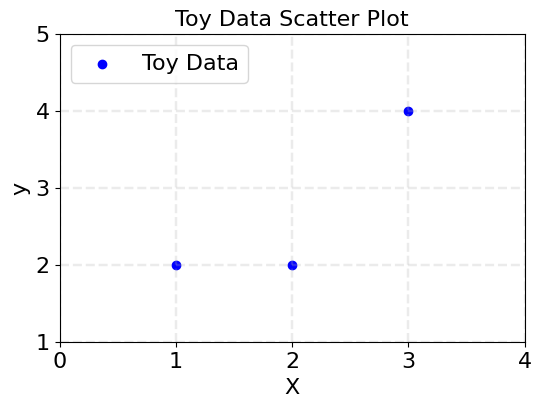

In [3]:
# Let's use matplotlib to create the plot and set various plotting aspects to make it asthetically pleasing
fig, ax = plt.subplots(1,1, figsize=(6,4))
font_size = 16
ax.scatter(X, y, color='blue', label='Toy Data')
ax.set_xlim(np.min(X)-1, np.max(X)+1)
ax.set_ylim(np.min(y)-1, np.max(y)+1)
ax.tick_params(labelsize=font_size)
ax.set_xlabel('X', fontsize=font_size)
ax.set_ylabel('y', fontsize=font_size)
ax.set_title('Toy Data Scatter Plot', fontsize=font_size)
ax.grid(True, lw=1.75, ls='--', alpha=0.25)
ax.legend(loc='upper left', fontsize=font_size) # more location options see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

## Fit a simple linear regression model to the toy dataset

Using the formula above, we can create a simple linear model as follows:

In [4]:
# first calculate the mean of X and y
X_mean = np.mean(X)
y_mean = np.mean(y)

# calculate the numerator and denominator of the slope
numerator = np.sum((X - X_mean)*(y - y_mean))
denominator = np.sum((X - X_mean)**2)

# calculate the slope and intercept
beta_1 = numerator / denominator # also known as the slope
beta_0 = y_mean - beta_1 * X_mean # also known as the intercept

print(f'beta_0 = {beta_0:.3f}')
print(f'beta_1 = {beta_1}')
print('The model is:')
print(f'y = {beta_1:.1f}X + {beta_0:.3f}')

print('The estimated y values for the training points are:')
print(beta_1*X + beta_0)

beta_0 = 0.667
beta_1 = 1.0
The model is:
y = 1.0X + 0.667
The estimated y values for the training points are:
[1.66666667 2.66666667 3.66666667]


Let's plot the regression line to visually inspect the result:

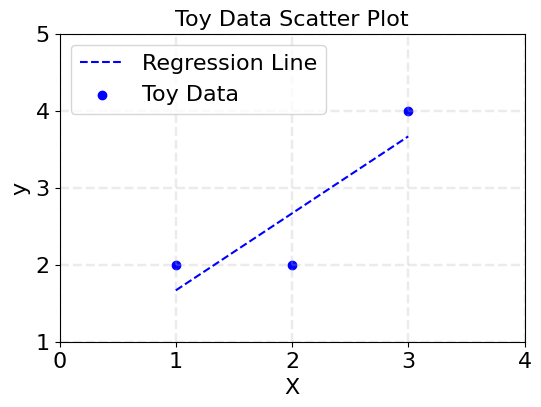

In [5]:
# define a range of X values to plot the regression line
X_range = np.linspace(np.min(X), np.max(X), 100)
# generate the y values using the regression line equation
y_hat = beta_1 * X_range + beta_0

# plot the regression line with the training points
fig, ax = plt.subplots(1,1, figsize=(6,4))
font_size = 16

# first plot the regression line
ax.plot(X_range, y_hat, color='blue', ls='--', label='Regression Line')

# add the training data
ax.scatter(X, y, color='blue', label='Toy Data')

# adjust the plot appearance
ax.set_xlim(np.min(X)-1, np.max(X)+1)
ax.set_ylim(np.min(y)-1, np.max(y)+1)
ax.tick_params(labelsize=font_size)
ax.set_xlabel('X', fontsize=font_size)
ax.set_ylabel('y', fontsize=font_size)
ax.set_title('Toy Data Scatter Plot', fontsize=font_size)
ax.grid(True, lw=1.75, ls='--', alpha=0.25)
ax.legend(loc='upper left', fontsize=font_size) # more location 

# Part 2: Linear regression models with statsmodels and sklearn

- introduce the two libraries
- discuss statsmodels linear regression model procedure, output, prediction for new samples, and potential problems of a linear fit
- discuss sklearn linear regression model procedure, prediction for new samples

Now that we can fit simple linear models to training data from scratch, let's review two `python` packages that can do this (and much more) for us:
* [statsmodels](http://www.statsmodels.org/stable/regression.html) and 
* [scikit-learn (sklearn)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

We will start by implementing a simple linear regression with these packages. For an important sanity check, we compare the $\beta$ values from `statsmodels` and `sklearn` to the $\beta$ values that we found above with our own implementation.

For simple linear regression and multiple linear regression `statsmodels` and `sklearn` both provide similar functionality. However, `statsmodels` tends to be easier for inference \[finding the values of the model coefficients and quantifying their uncertainty\], whereas `sklearn` is easier to use for prediction \[estimating y values for a given x value\].

**Note:** `statsmodels` and `sklearn` are different packages!  Unless otherwise specified, either can be used.

## statsmodels
Let's start by using statsmodels to create the model.

The first thing we need to know about statsmodels and linear regression, is that statsmodels does __not__ assume a non-zero intercept. Specifically, it treats the model as 

$y = \beta_1 X$

If we want to include an offset, we need to make sure that our training data, $X$ includes a column of ones. Fortunately, statsmodels includes a function do to this for us. This tells statsmodels to treat the model as

$y = \beta_1 X + \beta_0$

In the code cell below, we construct a linear regression model using the `OLS` class from statsmodels. The general syntax is:

```my_model = sm.OLS(y, X)```

This merely instantiates an instance of the `OLS` class that the `my_model` variable points to in memory. We also need to fit the model to the data using the `fit` method in the `OLS` class and assign the result (returned by the `fit` method) to another variable. The general syntax is:

```my_rslt = my_model.fit()```

Finally, we can obtain specific information from the result object (which is a different class type than the model object - how can you check this?). The process illustrated here follows a common pattern that is used in several Python data modeling libraries including statsmodels, scikit-learn, and pytorch.

In [6]:
# we use the sm.add_constant() function to add a column of 1s to the X matrix
X_sm = sm.add_constant(X)

# print the X_sm matrix
print("The X matrix with a column of 1s added:")
print(X_sm)

# let's fit a model with statsmodels OLS (original least squares) function - this is linear regression that fits the model using the least squares error loss function
sm_toy_model = sm.OLS(y, X_sm)

# fit the model and save the results
sm_toy_results = sm_toy_model.fit()

# let's view the estimated coefficients
beta0_sm = sm_toy_results.params[0]
beta1_sm = sm_toy_results.params[1]

print(f'\nbeta_0 from statsmodels = {beta0_sm:.3f}')
print(f'beta_1 from statsmodels = {beta1_sm:.3f}')

print('\nThe estimated y values for the training points are:')
print(sm_toy_results.predict(X_sm)) # NOTE: the predict function is in the results object and expects the X matrix with the column of 1s

The X matrix with a column of 1s added:
[[1. 1.]
 [1. 2.]
 [1. 3.]]

beta_0 from statsmodels = 0.667
beta_1 from statsmodels = 1.000

The estimated y values for the training points are:
[1.66666667 2.66666667 3.66666667]


statsmodels OLS provides a number of statistical measures related to the quality of the model. Let's review these:

In [7]:
warnings.filterwarnings('ignore') # suppress warnings for this example relative to the limited data size
print(sm_toy_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     3.000
Date:                Tue, 01 Jul 2025   Prob (F-statistic):              0.333
Time:                        14:14:45   Log-Likelihood:                -2.0007
No. Observations:                   3   AIC:                             8.001
Df Residuals:                       1   BIC:                             6.199
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6667      1.247      0.535      0.6

Let's make sure we understand the important values in the summary table:
- _No. Observations_: the number of samples used to create the model
- _Df Residuals_: degrees of freedom in the residuals, $y-\hat{y}$
- _Df Model_: degrees of freedom in the model
- _R-squared_: equal to the correlation, $Cor\left(Y,\hat{Y}\right)^2$, between the fitted and actual values (in linear regression with 1 variable it is the square of the correlation with $Y$ and $X$). Represents a measure of the how much the independent variables, $X$, explain the variance in the dependent variable $y$
- _Adj. R-squared_: a penalized version of _R-squared_ that accounts for the fact that adding independent variables always increases _R-squared_ even if they are uninformative
- _F-statistic_: a measure of the likelihood that the true linear coefficient are all zero (that is there is no linear relationship between the independent and dependent variables). Values near 1 suggest there is no relationship, values >> 1 suggest at least one coefficient is truly non-zero
- _Prob (F-statistic)_: the probability of observing a F-statistic value at least as large as the observed if the null hypothesis that all coefficients are actually zero is true. Thus, values close to zero indicate the null hypothesis should be rejected.
- _Log-likelihood_: a measure of model goodness of fit. Can range from $\left[-\infty, \infty\right]$. Higher values are better. The actual value is difficult to interpret, typically used to compare two or more models
- _AIC_: The _Akaike Information Criterion_ is also a measure of model fit where lower values are better. It is defined by $2 \left(p - LL\right)$ where LL is the Log-likelihood and $p$ is the number of model parameters (including the bias term)
- _BIC_: The _Bayesian Information Criterion_ is another measure of model fit where lower values are better. It is defined by $2 \left(p\ln N - LL\right)$ where LL is the Log-likelihood, $N$ is the number of samples in the training data, and $p$ is the number of model parameters (including the bias term)

The columns in the bottom portion of the table represent:
- _coef_: the estimated value of the coefficients 
- _std_err_: the _standard error_ of the coefficient estimates, tells us the amount, on average, that the estimate deviates from the actual coefficient
- _t_: the _t-statistic_ for the given coefficient. It is a test of the null hypothesis that the individual coefficient is actually zero (indicating no relation with the outcome, $y$). 
- _P>|t|_ : the probability of observing a t-statistic value at least as large as the observed one if the null hypothesis (of no relation for this coefficient) is true. Values close to zero indicate the null hypothesis should be rejected. 
- [0.025] - lower bound of 95% cofidence interval
- [0.975] - upper bound of 95% confidence interval

Finally, the lower portion of the summary table provide information on the residuals: 
- _Omnibus_: values near 0 indicate the residuals have a normal distribution
- _Prob(Omnibus)_: probabalistic measure of the residual normalcy, values near 1 indicate normal
- _Skew_: measure of data symmetry (0 is perfect symmetry)
- _Kurtosis_: measure of data concentration near 0, with higher values indicating fewer outliers
- _Durbin-Watson_ : measure of homoscedasticity (constant variance of error terms) with ideal values in $\left[1,2\right]$
- _Jarque-Bera (JB) and Prob(JB)_: alternate measures of Ominbus and Prob(Omnibus), respectively
- _Cond. No._: measure of collinearity with higher values indicating collinearity 

## sklearn linear regression

### Reshaping data for sklearn
In the code cells below, we will use scikit-learn (aka sklearn) to fit a linear regression model to the toy data. But first, we need to _reshape_ our predictor variable array because sklearn expects this input to be a 2-D array even when there is only one (1) predictor variable - this is not required for statsmodels unless there are more than 1 predictor variables. Typically, sklearn methods do allow the target array, `y`, to be 1-D.

For a given numpy array `X` with `K` elements, we can reshape it to any dimensions, `D={d1,d2, ..., dN}`  provided their product is equal to `K`, i.e., `d1 * d2 * ... * dN = K`. The general syntax is 

```X.reshape(d1, d2, ..., dN)```

The `reshape` method allows one input to be `-1` for which it will infer the dimension based on the length of the array and the other dimensions, i.e. if K = len(X), D = d1 * d2 * ... * dn for n not including the -1 dimension, then the inferred dimension will be K / D which needs to be an integer value.

For the case where we want to transform our 1-D array to a 2-D array, we can use:

```X.reshape(-1, 1)```

which will create an array with shape (K, 1).

Let's see some examples:

In [8]:
print(np.ones(1000).reshape(10,10,10).shape)
print(np.ones(1000).reshape(100,10).shape)
print(np.ones(100).reshape(-1, 10, 10).shape)
print(np.ones(100).reshape(10, -1, 5).shape) #
# np.ones(1000).reshape(10,10) # this will raise an error. Why?

(10, 10, 10)
(100, 10)
(1, 10, 10)
(10, 2, 5)


Let's reshape our predictor array and store the result in a new variable. Notice that calling reshape on `X` produces a new copy of the array in this case (there are exceptions, see [numpy reshape docs](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)).

In [9]:
# sklearn expects a 2D array for the X matrix
X_skl = X.reshape(-1,1)
print(X)
print('X.shape: ',X.shape)
print(X_skl)
print('X_sk.shape: ',X_skl.shape)

[1 2 3]
X.shape:  (3,)
[[1]
 [2]
 [3]]
X_sk.shape:  (3, 1)


### Fitting a linear regression model with sklearn

Let's now fit a linear regression model to the toy data using. We will use the sklearn `LinearRegression` class for this. The process is very similar to what we did for statsmodels. We first instantiate an instance of the `LinearRegression` class. We then use that object's `fit` method to learn the coefficients for our model. The general syntax is:

```my_model = LinearRegression()```

To fit the model to our data:

```my_model.fit(X,y)```

Unlike statsmodels, we do _not_ need to assign a separate variable to the `fit` results. Note that the sklearn `LinearRegression.fit` method assumes an intercept ($\beta_0$) should be included by default. This can be changed by setting `fit_intercept=False` when the `LinearRegression` object is instantiated. For more information see, [sklearn LinearRegression docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [10]:
# instantiate the LinearRegression model
skl_toy_model = LinearRegression()

# fit the model to the data
skl_toy_model.fit(X_skl, y)

# print the estimated coefficients
# sklearn LinearRegression stores beta_0 in the intercept_ attribute and beta_1 in the coef_ attribute
# the coef_ attribute is a numpy array because sklearn can fit multiple linear regression models (i.e., with multiple predictors)
print('beta0 = ', skl_toy_model.intercept_)
print('beta1 = ', skl_toy_model.coef_[0])

# let's also look at the predictions on the training data
y_hat = skl_toy_model.predict(X_skl)
print('The estimated y values for the training points are:')
print(y_hat)

beta0 =  0.6666666666666665
beta1 =  1.0
The estimated y values for the training points are:
[1.66666667 2.66666667 3.66666667]


Notice that, unlike statsmodels, sklearn does not provide a statistical summary function. The sklearn library does contain methods to calculate model performance statistics which we will encounter later.

# Part 3: Cab pickup counts  - linear regression with statsmodels
Let's pretend it's 2008 and there are no rideshare apps. Instead people needing a ride "call" (as in actually dial a phone number) for a cab (usually a yellow car, often with black checkers). We would like to be able to understand the relationship between the __time of day__ the cab is requested and the __pickup count__ (number of rides requested) to optimally schedule drivers. Our dataset, _cabs.txt_, contains samples of data where each sample is:

- `TimeMin` : the number of minutes since 12:00 AM (midnight) that the cab was requested
- `PickupCount` : the number of requests in the previous 60 minutes

## Cab pickup count - simple linear model
Let's start by fitting a simple linear model 

$y = \beta_1 x + \beta_0$

where <br/>
$x$ is the number of __hours__ past midnight of the request <br/>
$y$ is the number of requests for the preceeding 60 minutes (i.e., 1 hour)

We will load the data into a Pandas dataframe. We also need to add a new column that converts the given column, `TimeMin` to `TimeHours` (number of hours since midnight). 

We will also use teh `train_test_split` function (imported from scikit-learn) to split our data into a _training_ sample and a _test_ sample.

In [11]:
df_cab = pd.read_csv('../data/cabs.txt')
df_cab['TimeHours'] = df_cab['TimeMin']/60

df_train_cab, df_test_cab = train_test_split(df_cab, test_size=0.2, random_state=SEED)
print('df_train_cab.shape: ', df_train_cab.shape)
print('df_test_cab.shape: ', df_test_cab.shape)
df_train_cab.head()

df_train_cab.shape:  (1000, 3)
df_test_cab.shape:  (250, 3)


,TimeMin,PickupCount,TimeHours
662,167.0,5.0,2.783333
193,81.0,26.0,1.350000
843,837.0,23.0,13.950000
1003,1039.0,31.0,17.316667
197,1065.0,47.0,17.750000


Now,let's apply statsmodels to fit our _training_ data to a simple linear model. Notice, we again use the statsmodel `add_constant` method to add the constant column to our `X` values.

In [12]:
X_train_cab = sm.add_constant(df_train_cab['TimeHours'])
y_train_cab = df_train_cab['PickupCount']


# let's fit a model with statsmodels OLS (original least squares) function - this is linear regression that fits the model using the least squares error loss function
sm_cab_model = sm.OLS(y_train_cab, X_train_cab)

# fit the model and save the results
sm_cab_results = sm_cab_model.fit()

sm_cab_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PickupCount   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     319.3
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           3.59e-62
Time:                        14:14:45   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6486      1.054     15.798      0.000      14.581      18.717
TimeHours      1.4042      0.079     17.868      0.000       1.250       1.558
==============================================================================
Omnibus:                      226.558   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.109
Skew:                           1.197   Prob(JB):                    2.88e-121
Kurtosis:                       5.755   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let' consider some of the outputs here. Based on the Prob(F-statistic) and the p-values for coefficients ($conf\rightarrow \beta_0$, $TimeHours\rightarrow \beta_1$), it seems there is a high probability that there is some linear relationship between the the predictor, `TimeHours`, and the outcome, `PickupCount`. However, the _R-squared_ value seems low. 

Let's take a look at the training data and our regression line (i.e., our model).

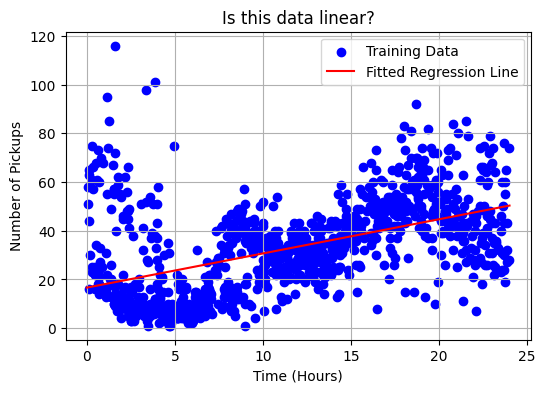

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.scatter(df_train_cab['TimeHours'], y_train_cab, color='blue', label='Training Data')
# plot the fitted regression line
ax.plot(np.linspace(0, 24), sm_cab_results.predict(sm.add_constant(np.linspace(0, 24))), color='red', label='Fitted Regression Line')
ax.set_xlabel('Time (Hours)')
ax.set_ylabel('Number of Pickups')
ax.set_title('Is this data linear?')
ax.legend()
ax.grid(True)


The training data doesn't appear to be linear. Indeed, it seems like it may be cubic (falls, rises, falls) in $x$. Another issue is apparent from the plot - notice that the number of pickups predicted by the model at time 0 (midnight, left-side of the plot) is much lower than at 11:59 (1 minute before midnight, right-side of the plot). We should expect them to be about the same. But, for a truly linear model, this is only possible if $\left|\beta_1\right| \ll 1$ (Why?). Let's try something else

## Cab pickup counts with multiple linear regression and a polynomial transformation
From the plot above, we might infer that a better model for our data is a third order polynomial:<br/>
$x = TimeHours$ <br/>
$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$

__Is this a linear model?__ Yes! Well, sort of. The relationship between the output $y$ and each variable $z_i = x^i$ is governed by a constant slope, $\beta_i$ which can be estimated with the linear regression approaches we've seen so far. So we still treat the problem as one of linear regression.

__Is this a simple linear regression model?__ No! We are now using multiple predictors in our model of $y$, making this a mulitple linear regression model!

### Polynomial transformations
How do we generate the data for $TimeHours^2$ and $TimeHours^3$. We will apply the `PolynomialFeatures` transformer from scikit learn to our data. __Transformers__ are used through scikit-learn and PyTorch to conventiently modify our dataset using common patterns. The `PolynomialFeatures` transformer takes an input data set, say `X`, and a degree, say `d`, and adds the columns $X^2, X^3, \ldots, X^{d-1}, X^d$. 

In general the syntax we will use for transformations is as follows:
```
# Instantiate a class that does the transformation
transformer = SomeTransformerClass()

# Option 1 Fit and then transform
transformer.fit(my_data) 
my_transformed_data = transformer.transform(my_data)

# Option 2 Fit and transform in one function call
my_transformed_data = transformer.fit_transform(my_data)
```

For the `PolynomialFeatures` transformation, the `fit` function doesn't do anything. We'll see other transformers, where the `fit` function is important.

Note: For use in statsmodels, we will want to add a constant column to our polynomial features, however, we should only do this after we applied the polynomial transformation. Why? 

In [14]:
df_train_cab_poly = df_train_cab.copy()
df_test_cab_poly = df_test_cab.copy()

# add polynomial features to the training and test data
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_cab_poly = poly.fit_transform(df_train_cab[['TimeHours']])
X_train_cab_poly = sm.add_constant(X_train_cab_poly)

# lets transform the test data too
# notice we use the transorms from the training data
# this is irrelevant for the polynomial features but is important for the scaling
X_test_cab_poly = poly.transform(df_test_cab[['TimeHours']])
X_test_cab_poly = sm.add_constant(X_test_cab_poly)

# fit a linear regression model to the polynomial features
sm_cab_poly_model = sm.OLS(y_train_cab, X_train_cab_poly)

# fit the model and save the results
sm_cab_poly_results = sm_cab_poly_model.fit()

print("Notice that the object returned by the PolynomialFeatures class is a numpy array (not a Pandas dataframe):")
print(type(X_train_cab_poly))
print("\nThe shape of the X_train_cab_poly matrix is:")
print(X_train_cab_poly.shape)
print("\nThe first 5 rows of the X_train_cab_poly matrix are:")
print(X_train_cab_poly[:5])

print("\nSummary data for multiple linear regression:")
sm_cab_poly_results.summary()

Notice that the object returned by the PolynomialFeatures class is a numpy array (not a Pandas dataframe):
<class 'numpy.ndarray'>

The shape of the X_train_cab_poly matrix is:
(1000, 4)

The first 5 rows of the X_train_cab_poly matrix are:
[[1.00000000e+00 2.78333333e+00 7.74694444e+00 2.15623287e+01]
 [1.00000000e+00 1.35000000e+00 1.82250000e+00 2.46037500e+00]
 [1.00000000e+00 1.39500000e+01 1.94602500e+02 2.71470487e+03]
 [1.00000000e+00 1.73166667e+01 2.99866944e+02 5.19269592e+03]
 [1.00000000e+00 1.77500000e+01 3.15062500e+02 5.59235938e+03]]

Summary data for multiple linear regression:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PickupCount   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          1.58e-103
Time:                        14:14:45   Log-Likelihood:                -4131.3
No. Observations:                1000   AIC:                             8271.
Df Residuals:                     996   BIC:                             8290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.3965      1.990     20.801      0.000      37.491      45.302
x1            -9.2296      0.714    -12.928      0.000     -10.631      -7.829
x2             1.0189      0.069     14.735      0.000       0.883       1.155
x3            -0.0267      0.002    -14.090      0.000      -0.030      -0.023
==============================================================================
Omnibus:                      197.145   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              475.376
Skew:                           1.053   Prob(JB):                    5.93e-104
Kurtosis:                       5.640   Cond. No.                     2.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It seems our $R^2$ has improved - though we added predictors, so it necessarily increased. However, the adjusted $R^2$ also improved, so it seems this may be a better model for this dataset. Let's look at a plot of the fit again.

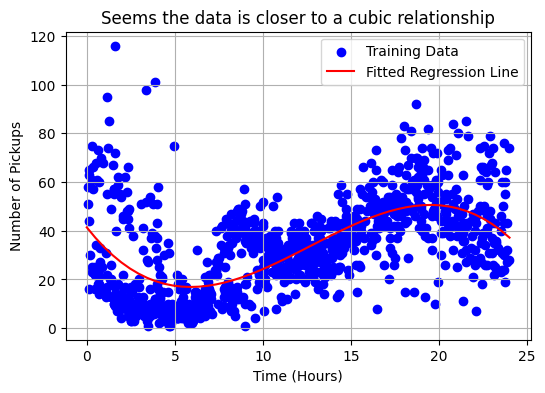

In [15]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.scatter(df_train_cab['TimeHours'], y_train_cab, color='blue', label='Training Data')
# plot the fitted regression line
x_line  =poly.transform(np.linspace(0, 24).reshape(-1,1))
y_hat = sm_cab_poly_results.predict(sm.add_constant(x_line))
ax.plot(np.linspace(0, 24), y_hat, color='red', label='Fitted Regression Line')
ax.set_xlabel('Time (Hours)')
ax.set_ylabel('Number of Pickups')
ax.set_title('Seems the data is closer to a cubic relationship')
ax.legend()
ax.grid(True)

Visually, it seems the regression line is a better fit. And the values at midnight and 11:59 PM are about the same. Let's take a look at the residuals and $R^2$ for our _test_ data.

Text(0, 0.5, 'Residuals')

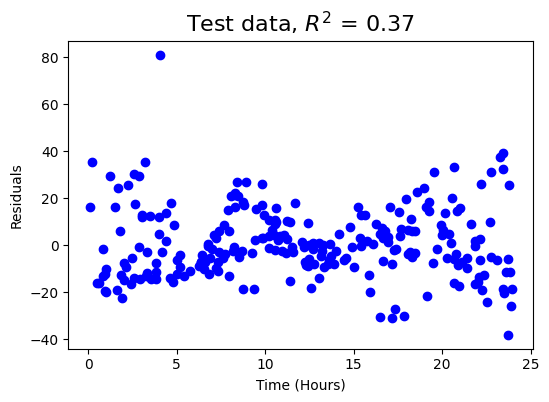

In [16]:
# let's see how we do on test data
y_hat_test = sm_cab_poly_results.predict(X_test_cab_poly)
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.scatter(df_test_cab['TimeHours'], df_test_cab['PickupCount']-y_hat_test, color='blue', label='Test Data')
# add text to the plot showing the R^2 value
ax.set_title(f'Test data, $R^2$ = {r2_score(df_test_cab["PickupCount"], y_hat_test):.2f}', fontsize=16)
ax.set_xlabel('Time (Hours)')
ax.set_ylabel('Residuals')

The residuals, appear approximately centered on 0 which is what we expect for a good model. Alos, the error (residual values) do not appear to depend on the predictor values, which is also good. 

# Part 4: Soccer linear regression example (sklearn)

In this example, we consider data from the __Fantasy Primier League__ (FPL). As we'll see the data includes information on players (e.g., age, position) and their _market value_ in the FPL. We would like to be able to predict a player's market value from the information about that player.

## A bit of data wrangling first

In [17]:
df_league = pd.read_csv('../data/league.txt')
df_league.head()

# Let's view some of the data
display(df_league.head(3))

# Are there any missing values
print('\nAre there features missing values?')
# find columns with missing values and print column name and number of missing values
print(df_league.isnull().sum()[df_league.isnull().sum()>0])

# Since there is only 1, let's drop it
df_league.dropna(inplace=True)

# Let's view the shape
print('\nThe shape of the data is:')
print(df_league.shape)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0



Are there features missing values?
region    1
dtype: int64

The shape of the data is:
(460, 17)



Many of these variables are string values: `club`,`position`, `nationality`, `fpl_sel`<br/>
There are also categorical variables: `club_id`, `position_cat`, `region`, `age_cat`. <br/>
There are also binary variables: `new_foreign`, `big_club`, `new_signing`. <br/>
The remaining variables are continuous: `age`, `market_value`, `page_views`, `fpl_value`, `fpl_points` <br/>

For the purposes of this lab, we're going to simplify our modeling process. To do we will: 
- Drop the string variables. All of these, except `nationality` and `fpl_sel`, have corresponding categorical variables. For `nationality`, we'll rely on the `region` variable. What else could we elect to do with `fpl_sel` (which is the percent of fantasy teams with this player) to use it in our model? 
- Drop `age_cat`. Instead we'll use `age` directly.
- Drop `club_id`. We'll rely on `region` and `big_club` as proxy variables. (Why might this not be a good idea?)

In [18]:
string_cols = df_league.select_dtypes(include='object').columns
# drop the string columns
df_league_model = df_league.drop(string_cols, axis=1, inplace=False)
df_league_model.drop(['club_id', 'age_cat'], axis=1, inplace=True)

# Let's view the columns to see if the string columns were dropped
print('\nThe columns in the data are:')
print(df_league_model.columns)

# Let's view the shape to make sure we didn't lose any rows
print('\nThe shape of the data is:')
print(df_league_model.shape)


The columns in the data are:
Index(['age', 'position_cat', 'market_value', 'page_views', 'fpl_value',
       'fpl_points', 'region', 'new_foreign', 'big_club', 'new_signing'],
      dtype='object')

The shape of the data is:
(460, 10)


### Converting categorical variables to dummy variables
We can use the binary and continuous values in our modeling without any modificaitons. However, need to convert the categorical variables to dummy variables. Recall from lecture, this means that for a categorical variable $X_{cat}$ that takes on the distinct values $\{x_1, x_2, \ldots, x_K\}$, we create $K-1$ binary variables $X_{cat-2}, X_{cat-3}, \ldots, X_{cat-K-1}$. Let's take a closer look at the distinct values for each of our categorical values. 

In [19]:
# show the distinct values for each categorical column
print('\nDistinct values for the categorical columns:')
for cv in ['position_cat', 'region']:
    print(f'{cv}: {df_league_model[cv].unique()}')


Distinct values for the categorical columns:
position_cat: [1 4 3 2]
region: [3. 2. 1. 4.]


We see that our two categorical variables, `position_cat` and `region` each have four (4) distinct values. Therefore, we will create three (3) dummy variables for each of these. (Why don't we need four?) Fortunately, Pandas provides the `get_dummies` function to create these. Let's see how it is used in the code cell below.

In [20]:
df_league_model_dummy = pd.get_dummies(df_league_model, columns=['position_cat', 'region'],drop_first=True, dtype=int)

# Let's view the shape
print('\nThe shape of the data is:')
print(df_league_model_dummy.shape)

# Let's view the columns to see what was added
print('\nThe columns in the data are:')
print(df_league_model_dummy.columns)

# Let's view the first few rows of the data
print('\nThe first few rows of the data are:')
df_league_model_dummy.head()


The shape of the data is:
(460, 14)

The columns in the data are:
Index(['age', 'market_value', 'page_views', 'fpl_value', 'fpl_points',
       'new_foreign', 'big_club', 'new_signing', 'position_cat_2',
       'position_cat_3', 'position_cat_4', 'region_2.0', 'region_3.0',
       'region_4.0'],
      dtype='object')

The first few rows of the data are:


,age,market_value,page_views,fpl_value,fpl_points,new_foreign,big_club,new_signing,position_cat_2,position_cat_3,position_cat_4,region_2.0,region_3.0,region_4.0
0,28,65.0,4329,12.0,264,0,1,0,0,0,0,0,1,0
1,28,50.0,4395,9.5,167,0,1,0,0,0,0,1,0,0
2,35,7.0,1529,5.5,134,0,1,0,0,0,1,1,0,0
3,28,20.0,2393,7.5,122,0,1,0,0,0,0,0,0,0
4,31,22.0,912,6.0,121,0,1,0,0,1,0,1,0,0


We see that the `position_cat` and `region` variables have been replaced with the new dummy varibales. We now have one more thing to do before we build our model: standardize the continuous variables.

### sklearn multiple linear regression model
Now we're ready to build a linear regression model on the FPL dataset. Let's first split the data into training and test sets.

In [21]:
# split the data into training and test sets
df_train_league, df_test_league = train_test_split(df_league_model_dummy, test_size=0.2, random_state=SEED)
print('df_train_league.shape: ', df_train_league.shape)
print('df_test_league.shape: ', df_test_league.shape)

df_train_league.shape:  (368, 14)
df_test_league.shape:  (92, 14)


Next, for convenience, let's assign variables to the predictor variables, `X`, and the target variable, `y`.

In [22]:
# let's separate the features from the target variable, which is 'market_value'
X_train_league = df_train_league.drop('market_value', axis=1)
y_train_league = df_train_league['market_value']

X_test_league = df_test_league.drop('market_value', axis=1)
y_test_league = df_test_league['market_value']

Now, we use the scikit-learn `LinearRegression` calss to construct a multiple linear regression model that includes the continuous variables and the dummy varaibles we created earlier as predictor variables.

In [23]:
# create the linear regression model
skl_league_lr = LinearRegression()

# fit the model to the training data
skl_league_lr.fit(X_train_league, y_train_league)

# print the estimated coefficients
print('The estimated coefficients are:')
for idx, cn in enumerate(X_train_league.columns):
    print(f'{cn}: {skl_league_lr.coef_[idx]:.4f}')
print(skl_league_lr.intercept_)
# print(skl_league_lr.coef_)
# y_hat = skl_league_lr.predict(X_test_league)
# r2 = r2_score(y_test_league, y_hat)
# print(r2)


The estimated coefficients are:
age: -0.4255
page_views: 0.0018
fpl_value: 4.2850
fpl_points: 0.0532
new_foreign: 2.9316
big_club: 5.7709
new_signing: -0.2174
position_cat_2: 4.6365
position_cat_3: 3.0899
position_cat_4: 3.8600
region_2.0: 2.5888
region_3.0: 2.2070
region_4.0: 2.8532
-11.528680566571227


We notice that `age` has a negative coefficient. This implies that as age increases, market value always drops. Do we think that is always true? We'll examine this more in the next homework. We also see that `page_views` has an approximately 0 coefficient. This also seems unexpected as might expect players with more page views to have a higher market value. This is something else we could examine with more time.

In the interest of time, let's move on to assessing performance on the test set.

Text(0, 0.5, 'Residuals')

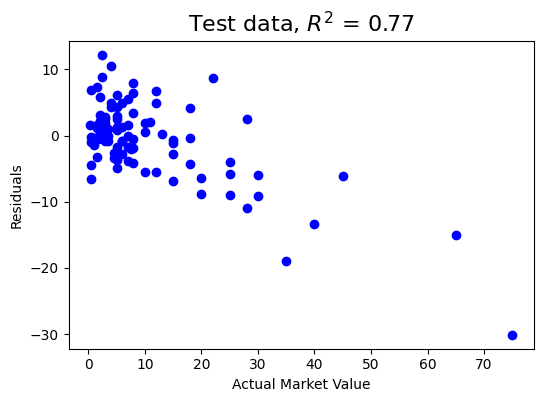

In [24]:
# let's see the residuals for the test data
fig, ax = plt.subplots(1,1, figsize=(6,4))
y_hat = skl_league_lr.predict(X_test_league)
ax.scatter(y_test_league, y_hat-y_test_league, color='blue', label='Test Data')
# add text to the plot showing the R^2 value
ax.set_title(f'Test data, $R^2$ = {r2_score(y_test_league, y_hat):.2f}', fontsize=16)
ax.set_xlabel('Actual Market Value')
ax.set_ylabel('Residuals')


### Bootrappping to examine the predictor and performance distributions

Here, we can apply bootstrapping to generate a multiple samples from our data and fit multiple models. This will enable us to understand the variability (i.e., standard error) for the model coefficients and the model performance.

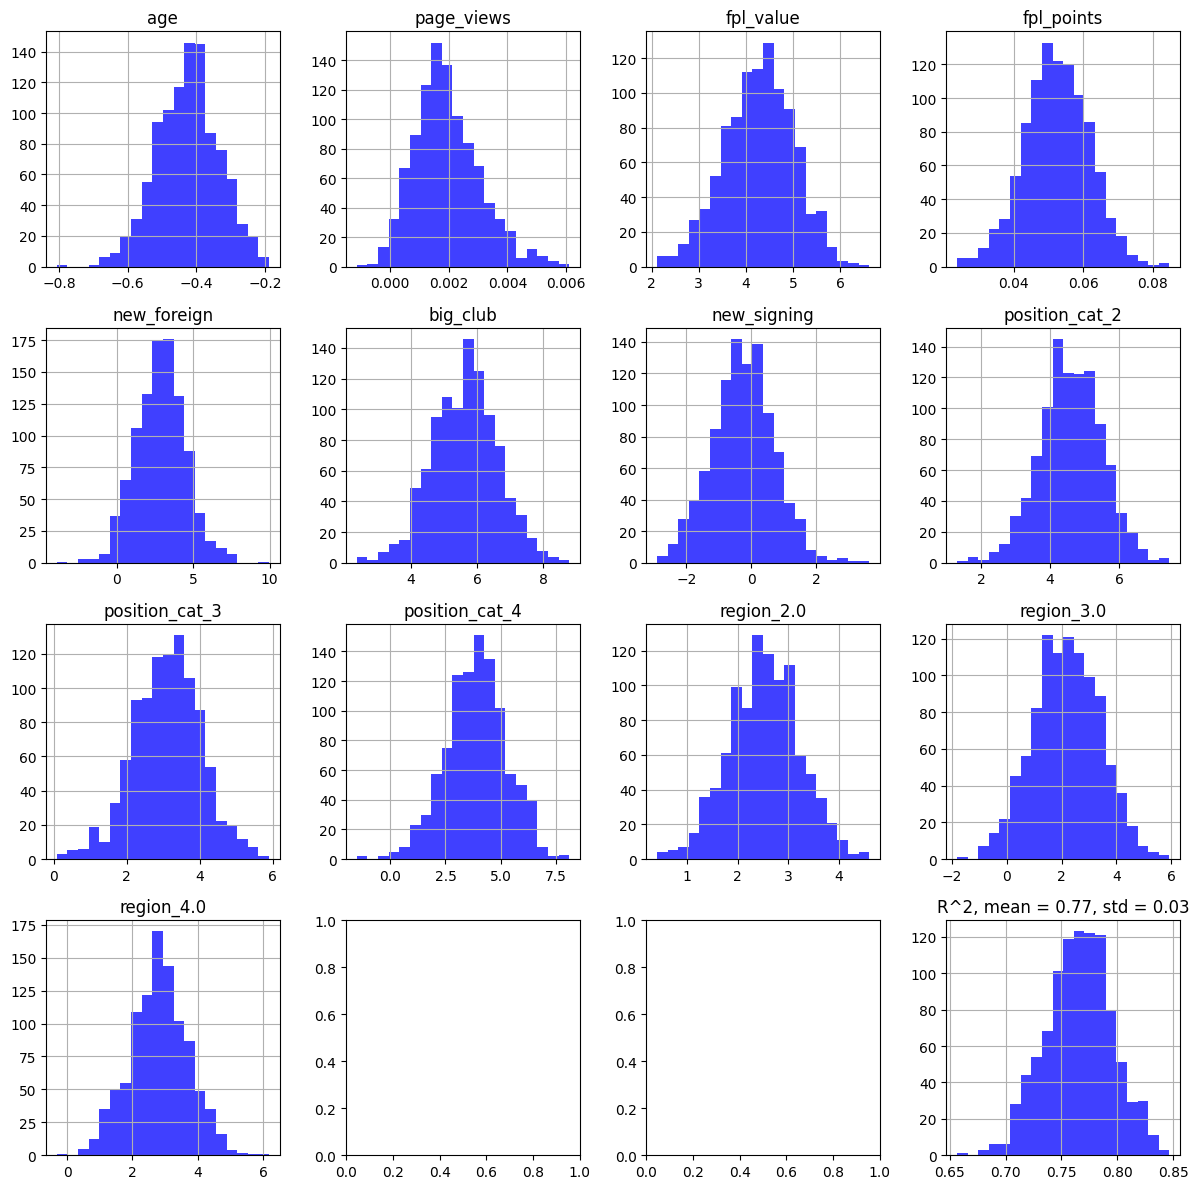

In [25]:
# let's apply bootstrapping to the league data to create a distribution of the coefficients
n_bootstraps = 1000
coefs = np.zeros((n_bootstraps, X_train_league.shape[1]))
# store the R^2 values
r2 = np.zeros(n_bootstraps)

for i in range(n_bootstraps):
    # sample with replacement from the training data
    idx = np.random.choice(X_train_league.index, size=X_train_league.shape[0], replace=True)
    X_boot = X_train_league.loc[idx]
    y_boot = y_train_league.loc[idx]

    # fit the model
    skl_league_lr.fit(X_boot, y_boot)
    coefs[i] = skl_league_lr.coef_

    # calculate the R^2 value for the test data
    y_hat = skl_league_lr.predict(X_test_league)
    r2[i] = r2_score(y_test_league, y_hat)

# plot the distribution of the coefficients for each feature in a grid of subplots
k = 4
fig, ax = plt.subplots(k,k, figsize=(12, 12))
for i in range(X_train_league.shape[1]):
    ax[i//k, i%k].hist(coefs[:, i], bins=20, color='blue', alpha=0.75)
    ax[i//k, i%k].set_title(X_train_league.columns[i])
    ax[i//k, i%k].grid(True)

# plot the r2 distribution on ax[3,3]
ax[k-1, k-1].hist(r2, bins=20, color='blue', alpha=0.75)
# add the mean and standard deviation of the R^2 values to the plot title
ax[k-1, k-1].set_title(f'R^2, mean = {np.mean(r2):.2f}, std = {np.std(r2):.2f}')
ax[k-1, k-1].grid(True)


plt.tight_layout()


In [26]:
# let's try using k-fold cross-validation to estimate the R^2 value variance
# create the linear regression model
skl_league_lr = LinearRegression()

# perform 10-fold cross-validation
r2 = cross_val_score(skl_league_lr, X_train_league, y_train_league, cv=10, scoring='r2')
print(f'The mean R^2 value is: {r2.mean():.2f}')
print(f'The R^2 value standard deviation is: {r2.std():.2f}')


The mean R^2 value is: 0.72
The R^2 value standard deviation is: 0.09


What is your interpretation of the difference between the bootstrap and cross-validation estimates of mean and variance in $R^2$? How do these methods differ in their respective model training and performance estimates?